# Convolutional Neural Network - Cat or Dog

In [1]:
# importing libraries

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.5.0'

In [3]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

## Data Preprocessing

In [4]:
# defining the training and testing images directories

base_dir = 'C:/DevelopmentPlayground/Datasets/CNN/'

training_image_dir = os.path.join(base_dir, 'training_set/')
testing_image_dir = os.path.join(base_dir, 'test_set/')

# Directory with our training cat/dog pictures
training_cats_dir = os.path.join(training_image_dir, 'cats/')
print('training_cats_dir :', training_cats_dir)

training_dogs_dir = os.path.join(training_image_dir, 'dogs/')
print('training_dogs_dir :', training_dogs_dir)


# Directory with our test cat/dog pictures
test_cats_dir = os.path.join(testing_image_dir, 'cats/')
print('test_cats_dir :', test_cats_dir)

test_dogs_dir = os.path.join(testing_image_dir, 'dogs/')
print('test_dogs_dir :', test_dogs_dir)


training_cats_dir : C:/DevelopmentPlayground/Datasets/CNN/training_set/cats/
training_dogs_dir : C:/DevelopmentPlayground/Datasets/CNN/training_set/dogs/
test_cats_dir : C:/DevelopmentPlayground/Datasets/CNN/test_set/cats/
test_dogs_dir : C:/DevelopmentPlayground/Datasets/CNN/test_set/dogs/


In [5]:
# checking the filenames of dogs and cats

training_cat_fnames = os.listdir(training_cats_dir)
training_dog_fnames = os.listdir(training_dogs_dir)

print("Cat filenames : ", training_cat_fnames[:10])
print("\n")
print("Dog filenames : ", training_dog_fnames[:10])

Cat filenames :  ['cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.1001.jpg', 'cat.1002.jpg', 'cat.1003.jpg', 'cat.1004.jpg', 'cat.1005.jpg', 'cat.1006.jpg']


Dog filenames :  ['dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.1001.jpg', 'dog.1002.jpg', 'dog.1003.jpg', 'dog.1004.jpg', 'dog.1005.jpg', 'dog.1006.jpg']


## Visualizing the Data

In [6]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# parameters for output graph, we'll output images in a 4x4 configuration
nrows= 4
ncols= 4

pic_index = 0 # Index for iterating over the images

<function matplotlib.pyplot.show(close=None, block=None)>

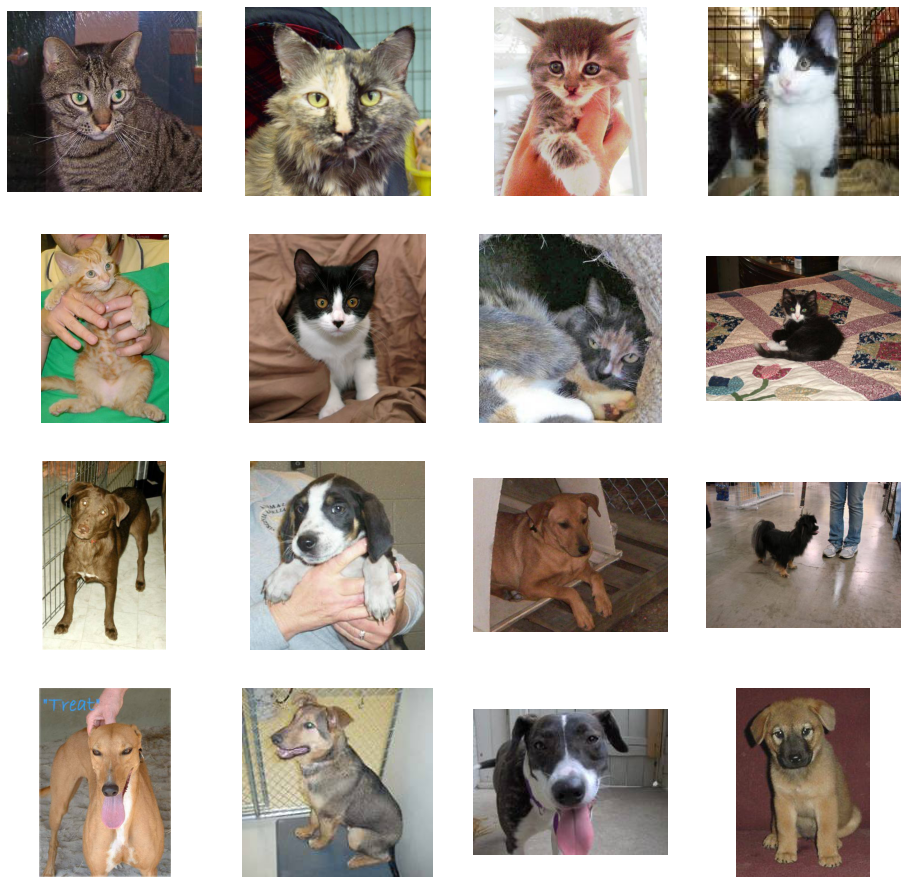

In [7]:
# displaying a batch of 8 cats and 8 dogs. 

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index +=  8

next_cat_pix = [os.path.join(training_cats_dir, fname)
                 for fname in training_cat_fnames[pic_index - 8: pic_index]
               ]

next_dog_pix = [os.path.join(training_dogs_dir, fname)
                   for fname in training_dog_fnames[pic_index - 8 : pic_index]
               ]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
    # set up subplot, subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('off') # hiding the axes or gridlines
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show

## Preprocessing the Training set

In [8]:
# image augmentation,

train_data_generator = ImageDataGenerator(rescale=1./255,
                                         shear_range=0.2,
                                         zoom_range=0.2,
                                         horizontal_flip=True,
                                         vertical_flip=True,
                                         rotation_range=20,
                                         width_shift_range=0.05,
                                         height_shift_range=0.05)

training_set = train_data_generator.flow_from_directory(training_image_dir,
                                                       target_size=(64, 64),
                                                       batch_size=32,
                                                       class_mode='binary')

Found 8000 images belonging to 2 classes.


## Preprocessng the Test set

In [9]:
test_data_generator = ImageDataGenerator(rescale=1./255)

test_set = test_data_generator.flow_from_directory(testing_image_dir,
                                                  target_size=(64,64),
                                                  batch_size=32,
                                                  class_mode='binary')

Found 2000 images belonging to 2 classes.


## Building the CNN

## Initialising the CNN

In [10]:
cnn = tf.keras.models.Sequential()

## Step 1 - Convolution

In [11]:
cnn.add(tf.keras.layers.Conv2D(input_shape=[64, 64, 3], filters=32, kernel_size=3, activation='relu'))

## Step 2 - Pooling

In [12]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

## Adding a Second Convolutional layer & Pooling

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3 , activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

## Step 3 - Flattening

In [14]:
cnn.add(tf.keras.layers.Flatten())

## Step 4 - Full Connection

In [15]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

## Step 5 - Output Layer 

In [16]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the CNN

## compiling the CNN

In [17]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

## Training the CNN on the Training set and Evaluating on the Test set

In [19]:
import datetime
start = datetime.datetime.now()

cnn.fit(x = training_set, validation_data=test_set, epochs=25, verbose=1)

stop = datetime.datetime.now()
print("Total time taken : ", str(stop - start))

Epoch 1/25
250/250 [==============================] - 118s 435ms/step - loss: 0.6931 - accuracy: 0.5320 - val_loss: 0.6739 - val_accuracy: 0.5920
Epoch 2/25
250/250 [==============================] - 53s 210ms/step - loss: 0.6707 - accuracy: 0.5903 - val_loss: 0.6465 - val_accuracy: 0.6360
Epoch 3/25
250/250 [==============================] - 58s 233ms/step - loss: 0.6380 - accuracy: 0.6349 - val_loss: 0.6084 - val_accuracy: 0.6715
Epoch 4/25
250/250 [==============================] - 63s 252ms/step - loss: 0.6091 - accuracy: 0.6633 - val_loss: 0.6522 - val_accuracy: 0.6300
Epoch 5/25
250/250 [==============================] - 61s 246ms/step - loss: 0.5913 - accuracy: 0.6833 - val_loss: 0.5745 - val_accuracy: 0.6980
Epoch 6/25
250/250 [==============================] - 59s 237ms/step - loss: 0.5818 - accuracy: 0.6930 - val_loss: 0.5699 - val_accuracy: 0.7070
Epoch 7/25
250/250 [==============================] - 55s 221ms/step - loss: 0.5766 - accuracy: 0.6921 - val_loss: 0.5722 - val_a

## Saving the model

### serialize model to JSON

In [21]:
cats_and_dogs_json = cnn.to_json()
with open("cats_and_dogs.json", "w") as json_file:
    json_file.write(cats_and_dogs_json)

# serialize weights to HDF5
cnn.save_weights("cats_and_dogs.h5")
print("Saved model to disk")

Saved model to disk


## Load json and create Model

In [22]:
from tensorflow.keras.models import model_from_json
json_file = open("cats_and_dogs.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load the weights into new model
loaded_model.load_weights("cats_and_dogs.h5")
print("Loaded model from disk")

Loaded model from disk


##  Making a single prediction

In [33]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img(base_dir+'/single_prediction/cat_or_dog_1.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = loaded_model.predict(test_image/255.0)

training_set.class_indices

print('result :', result)
print('training_set.class_indices :',training_set.class_indices)

if result[0][0] > 0.5:
  prediction = 'dog'
else:
  prediction = 'cat'

result : [[0.99967504]]
training_set.class_indices : {'cats': 0, 'dogs': 1}


In [34]:
print(prediction)

dog
